In [18]:
from igraph import Graph
import pandas as pd

In [161]:
import igraph
import networkx as nx

In [106]:
nodes=pd.read_csv('Nodes_df4.csv')

In [28]:
edges=pd.read_csv('Edges_df4.csv')

In [21]:
edges.columns

Index(['Source', 'Target', 'Type', 'Kind', 'Id', 'Label', 'Interval',
       'Weight'],
      dtype='object')

#### prove con igraph

In [29]:
g=Graph.DataFrame(edges=edges[['Source','Target']],directed=True)

In [30]:
dendogram=g.community_edge_betweenness(directed=True)

In [160]:
clustered=dendogram.as_clustering(84)

In [49]:
giant_component=clustered.giant()
dendogram_giant=giant_component.community_edge_betweenness(directed=True)
clustered_giant=dendogram_giant.as_clustering(3)
clustered_giant_graph_nodes=clustered_giant.graph.vs["name"]

In [86]:
memberships=clustered_giant.membership

In [104]:
nodes_df=pd.DataFrame()

nodes_df['node']=clustered_giant_graph_nodes
nodes_df['cluster']=memberships

In [107]:
nodes.columns

Index(['Id', 'Label', 'Interval', 'Colour'], dtype='object')

In [187]:
nodes['Colour']='#aaaacc'

In [188]:
colour=[]
for index, row in nodes_df.iterrows():
    subset=nodes[nodes.Id==int(row['node'])]
    if subset.empty == False:
        sub_index=subset.index
        if row['cluster']==0:
            nodes.at[sub_index,'Colour']='#fb1239'
        if row['cluster']==1:
            nodes.at[sub_index,'Colour']='#007474'
        if row['cluster']==2:
            nodes.at[sub_index,'Colour']='#042069'
    else:
        continue

In [189]:
nodes.to_csv('Nodes_df4_cluster.csv',index=False)

#### prove con networkx

In [168]:
g_nx=nx.from_pandas_edgelist(edges,source='Source',target='Target')

In [169]:
component_subgraph_list = list(nx.connected_components(g_nx))

In [172]:
largest_component = list(max(component_subgraph_list,key=len))

In [235]:
nodes=pd.read_csv('Nodes_df4.csv')

In [200]:
nodes_list=list(nodes.Id)

In [205]:
new_edges=edges[(edges['Source'].isin(largest_component)) & (edges['Target'].isin(largest_component))]

In [207]:
new_g=Graph.DataFrame(edges=new_edges[['Source','Target']],directed=True)

In [249]:
dendogram=new_g.community_edge_betweenness(clusters=2,directed=True)

In [251]:
clustered=dendogram.as_clustering(2)
eigen=clustered

In [354]:
eigen=new_g.community_leading_eigenvector(5)

C:\Users\Eric\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\igraph\__init__.py:1281: RuntimeWarning: This method was developed for undirected graphs at src/community/leading_eigenvector.c:530
  membership, _, q = GraphBase.community_leading_eigenvector(


In [261]:
eigen.summary()

'Clustering with 3527 elements and 2 clusters'

In [355]:
eigen_nodes=eigen.graph.vs["name"]

In [356]:
df_eigen=pd.DataFrame({'nodes':eigen_nodes,'clusters':eigen._membership})

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

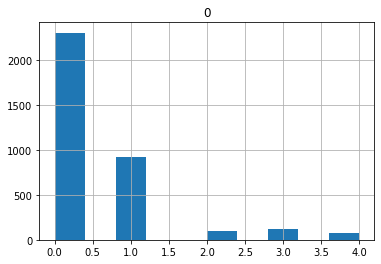

In [357]:
pd.DataFrame(eigen._membership).hist()

In [359]:
nodes['Colour']='#aaaacc'

colour=[]
for index, row in df_eigen.iterrows():
    subset=nodes[nodes.Id==int(row['nodes'])]
    if subset.empty == False:
        sub_index=subset.index
        if row['clusters']==0:
            nodes.at[sub_index,'Colour']=1
        if row['clusters']==1:
            nodes.at[sub_index,'Colour']=2
        if row['clusters']==2:
            nodes.at[sub_index,'Colour']=3
        if row['clusters']==3:
            nodes.at[sub_index,'Colour']=4
        if row['clusters']==4:
            nodes.at[sub_index,'Colour']=5
    else:
        continue

In [195]:
#codice per identificare giant component
nodes['Colour']='#aaaacc'

colour=[]
for index in eigen_nodes:
    subset=nodes[nodes.Id==index]
    if subset.empty == False:
        sub_index=subset.index
        nodes.at[sub_index,'Colour']='#fb1239'
    else:
        continue

In [360]:
nodes.to_csv('Nodes_df4_cluster.csv',index=False)

#### Creazione indice e applicazione k-means

In [299]:
new_edges.head()

,Source,Target,Type,Kind,Id,Label,Interval,Weight
0,321228288,1173223843,Directed,NaN,1,NaN,NaN,1.0
1,1426639026824564737,1364298062919794688,Directed,NaN,2,NaN,NaN,1.0
2,272945830,2380463039,Directed,NaN,3,NaN,NaN,1.0
3,745351426117869568,1238800491632607232,Directed,NaN,4,NaN,NaN,1.0
4,798461063494828032,1173223843,Directed,NaN,5,NaN,NaN,1.0


In [300]:
nodes.head()

,Id,Label,Interval,Colour
0,321228288,marsion65,NaN,8
1,1426639026824564737,MaurizioCimino2,NaN,2
2,272945830,AleC226,NaN,2
3,745351426117869568,Massimi8900,NaN,2
4,798461063494828032,IvanoPioli,NaN,8


In [340]:
contiguous_nodes_dict={}

for node in nodes.Id:
    lista_target=list(new_edges[new_edges.Source==node]['Target'])
    lista_source=list(new_edges[new_edges.Target==node]['Source'])
    lista_tot=lista_target+lista_source
    if lista_tot != []:
        contiguous_nodes_dict[node]=lista_tot

In [341]:
def Jaccard(nodesA,nodesB):
    intersect = [value for value in nodesA if value in nodesB]
    union=list(set(nodesA+nodesB))
    compute_jaccard=len(intersect)/len(union)
    return compute_jaccard

In [342]:
distance_matrix_j=[[ Jaccard(values_col,values_row) for values_row in contiguous_nodes_dict.values()] for values_col in contiguous_nodes_dict.values()]

In [375]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0,n_init=100,max_iter=1000,algorithm="elkan").fit(distance_matrix_j)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

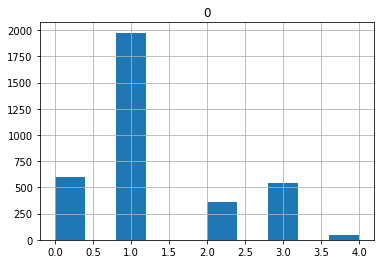

In [376]:
pd.DataFrame(kmeans.labels_).hist()

In [377]:
df_means=pd.DataFrame({'nodes':contiguous_nodes_dict.keys(),'clusters':kmeans.labels_})

In [378]:
nodes['Colour']='#aaaacc'

colour=[]
for index, row in df_means.iterrows():
    subset=nodes[nodes.Id==int(row['nodes'])]
    if subset.empty == False:
        sub_index=subset.index
        if row['clusters']==0:
            nodes.at[sub_index,'Colour']='1'
        if row['clusters']==1:
            nodes.at[sub_index,'Colour']='2'
        if row['clusters']==2:
            nodes.at[sub_index,'Colour']='3'
        if row['clusters']==3:
            nodes.at[sub_index,'Colour']='4'
        if row['clusters']==4:
            nodes.at[sub_index,'Colour']='5'
    else:
        continue

In [379]:
nodes.to_csv('Nodes_df4_cluster.csv',index=False)

In [ ]:
#creare una funzione per calcolo jaccard

#creare una funzione per calcolo cosine

#creare 2 matrici distanze

#### Modularity maximization

In [386]:
print(nx.info(g_nx))

Name: 
Type: Graph
Number of nodes: 3735
Number of edges: 4792
Average degree:   2.5660
